# Pydantic

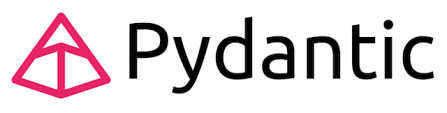

Pydantic — это библиотека проверки данных и управления настройками для Python, созданная для повышения прочности и надежности вашей кодовой базы.  

Pydantic также хорошо интегрируется со многими популярными инструментами статической типизации и IDE, что позволяет выявлять проблемы со схемами до запуска кода.

С использованием Pydantic программисту не нужно тратить время на написание многословного кода для проверки типов данных. Вместо этого, можно определить модель данных с помощью аннотаций типов Python и использовать ее для автоматической валидации входных данных. Это упрощает разработку и делает код более надежным.

## Отличительные особенности

*   Кастомизация
*   Гибкость
*   Сериализация
*   Производительность
*   Экосистема и промышленное внедрение



## Краткая история Pydantic

**Версия 1.0 (2018 год)**

* Первая стабильная версия, включающая базовые функции валидации и сериализации данных
* Поддержка базовых типов данных и аннотаций типов
* Возможность создания простых моделей данных с валидацией

**Версия 1.4 (2019 год)**

* Введение поддержки вложенных моделей и более сложных структур данных
* Улучшение производительности и расширение функциональности кастомных валидаторов
* Интеграция с FastAPI, что позволило использовать Pydantic для создания API с автоматической валидацией

**Версия 1.7 (2020 год)**

* Добавление новых типов данных, таких как `UUID`, `Decimal` и `IPvAnyAddress`
* Улучшение сообщений об ошибках валидации, что сделало их более информативными и понятными
* Оптимизация производительности и уменьшение времени обработки данных


**Версия 1.8 (2021 год)**

* Расширение возможностей для работы с конфигурационными файлами и настройками моделей
* Улучшение работы с `datetime` объектами и поддержка различных форматов дат и времени
* Введение поддержки динамического создания моделей с помощью функции `create_model`

**Версия 2.2 (2023 год)**

* Переписанный на Rust модуль `pydantic-core` для валидации, что значительно повысило производительность
* Поддержка Python 3.8 и выше
* Новый интерфейс для конфигурации моделей
* Улучшенная система сообщений об ошибках, что делает их более информативными

**Версия 2.7 (2024 год)**

* Введение опции `serialize_as_any` для сериализации объектов с произвольными полями
* Возможность передавать контекст в процессе сериализации для более гибкой обработки данных
* Улучшения производительности и новые функции, такие как расширенные возможности работы с аннотациями типов и оптимизация процесса валидации данных​

### Установка и импорт

In [ ]:
!pip install -U pydantic[email,timezone]

*  `-U` — обновляет Pydantic до последней версии, если он уже установлен, или просто установит последнюю доступную версию, если Pydantic отсутствует.

*  `[email,timezone]` — эти флаги добавляют дополнительные модули и валидаторы, которые могут быть полезны в проекте.

In [ ]:
# !python -m pip install "pydantic[email]"
# !python -m pip install pydantic-settings

In [ ]:
!pip install devtools

In [ ]:
import pydantic

from devtools import pprint

## BaseModel

Модели данных в Pydantic представляют собой основу для валидации и сериализации данных. Они позволяют разработчикам описывать структуру данных с помощью классов Python, используя аннотации типов для определения полей и их атрибутов. Это обеспечивает высокую степень типизации, автоматическую валидацию и преобразование данных, что существенно упрощает разработку приложений.

Модели в Pydantic наследуются от класса `BaseModel`. Каждая модель описывает набор полей, которые представляют собой структуру данных и условия для их валидации

Определим модель сотрудника

In [ ]:
from datetime import date
from uuid import UUID, uuid4
from enum import Enum
from pydantic import BaseModel, EmailStr

class Department(Enum):
    HR = "HR"
    SALES = "SALES"
    IT = "IT"
    ENGINEERING = "ENGINEERING"


class Employee(BaseModel):
    employee_id: UUID = uuid4()
    name: str
    email: EmailStr
    date_of_birth: date
    salary: float
    department: Department
    elected_benefits: bool

Создание экземпляра модели данных происходит путём передачи соответствующих значений в конструктор модели. Pydantic автоматически выполняет валидацию и преобразование данных согласно указанным типам

In [ ]:
chris = Employee(
    name="Chris DeTuma",
    email="cdetuma@example.com",
    date_of_birth="1998-04-02",
    salary=123_000.00,
    department="IT",
    elected_benefits=True,
    )

In [ ]:
pprint(chris)

Employee(
    employee_id=UUID('2c1527b0-6ddb-45b0-907e-f0256f89c8bd'),
    name='Chris DeTuma',
    email='cdetuma@example.com',
    date_of_birth=datetime.date(1998, 4, 2),
    salary=123000.0,
    department=<Department.IT: 'IT'>,
    elected_benefits=True,
)


Одной из ключевых особенностей Pydantic является автоматическая валидация данных при создании экземпляров моделей. Pydantic проверяет соответствие каждого переданного значения ожидаемому типу и генерирует ошибки валидации, если данные не соответствуют требованиям

In [ ]:
# bad_guy = Employee(
#     employee_id="123",
#     name=False,
#     email="cdetumaexamplecom",
#     date_of_birth="1939804-02",
#     salary="high paying",
#     department="PRODUCT",
#     elected_benefits=300,
#     )

## Словари, JSON

In [ ]:
new_employee_dict = {
    "name": "Chris DeTuma",
    "email": "cdetuma@example.com",
    "date_of_birth": "1998-04-02",
    "salary": 123_000.00,
    "department": "IT",
    "elected_benefits": True,
    }

In [ ]:
pprint(Employee.model_validate(new_employee_dict))

Employee(
    employee_id=UUID('95e0981e-8e49-4e8f-ac94-9d7b54de176a'),
    name='Chris DeTuma',
    email='cdetuma@example.com',
    date_of_birth=datetime.date(1998, 4, 2),
    salary=123000.0,
    department=<Department.IT: 'IT'>,
    elected_benefits=True,
)


In [ ]:
new_employee_json = """
  {"employee_id":"d2e7b773-926b-49df-939a-5e98cbb9c9eb",
  "name":"Eric Slogrenta",
  "email":"eric.slogrenta@gmail.com",
  "date_of_birth":"1990-01-02",
  "salary":125000.0,
  "department":"HR",
  "elected_benefits":false}
  """

In [ ]:
new_employee = Employee.model_validate_json(new_employee_json)

In [ ]:
pprint(new_employee)

Employee(
    employee_id=UUID('d2e7b773-926b-49df-939a-5e98cbb9c9eb'),
    name='Eric Slogrenta',
    email='eric.slogrenta@gmail.com',
    date_of_birth=datetime.date(1990, 1, 2),
    salary=125000.0,
    department=<Department.HR: 'HR'>,
    elected_benefits=False,
)


Вы также можете сериализовать модели Pydantic в виде словарей и JSON

In [ ]:
new_employee.model_dump()

{'employee_id': UUID('d2e7b773-926b-49df-939a-5e98cbb9c9eb'),
 'name': 'Eric Slogrenta',
 'email': 'eric.slogrenta@gmail.com',
 'date_of_birth': datetime.date(1990, 1, 2),
 'salary': 125000.0,
 'department': <Department.HR: 'HR'>,
 'elected_benefits': False}

In [ ]:
pprint(new_employee.model_dump_json())

(
    '{"employee_id":"d2e7b773-926b-49df-939a-5e98cbb9c9eb","name":"Eric Slogrenta","email":"eric.slogrenta@gmail.com",'
    '"date_of_birth":"1990-01-02","salary":125000.0,"department":"HR","elected_benefits":false}'
)


### Схема JSON

https://json-schema.org/understanding-json-schema/about

In [ ]:
pprint(Employee.model_json_schema())

{
    '$defs': {
        'Department': {
            'enum': [
                'HR',
                'SALES',
                'IT',
                'ENGINEERING',
            ],
            'title': 'Department',
            'type': 'string',
        },
    },
    'properties': {
        'employee_id': {
            'default': '2c1527b0-6ddb-45b0-907e-f0256f89c8bd',
            'format': 'uuid',
            'title': 'Employee Id',
            'type': 'string',
        },
        'name': {
            'title': 'Name',
            'type': 'string',
        },
        'email': {
            'format': 'email',
            'title': 'Email',
            'type': 'string',
        },
        'date_of_birth': {
            'format': 'date',
            'title': 'Date Of Birth',
            'type': 'string',
        },
        'salary': {
            'title': 'Salary',
            'type': 'number',
        },
        'department': {
            '$ref': '#/$defs/Department',
        },
        'e

## Поля в модели

Описание полей:

* **Типизация**  
Поля в модели описываются с указанием типов, например, `name: str`. Это обеспечивает базовую типовую валидацию

* **Использование `Field()`**  
Позволяет аннотировать поля с дополнительными параметрами, такими как значения по умолчанию, ограничения и другие настройки

In [ ]:
from datetime import date
from uuid import UUID, uuid4
from enum import Enum
from pydantic import BaseModel, EmailStr, Field

class Department(Enum):
    HR = "HR"
    SALES = "SALES"
    IT = "IT"
    ENGINEERING = "ENGINEERING"


class Employee(BaseModel):
    employee_id: UUID = Field(default_factory=uuid4, frozen=True)
    name: str = Field(min_length=1, frozen=True)
    email: EmailStr = Field(pattern=r".+@example\.com$")
    date_of_birth: date = Field(alias="birth_date", repr=False, frozen=True)
    salary: float = Field(alias="compensation", gt=0, repr=False)
    department: Department
    elected_benefits: bool

In [ ]:
incorrect_employee_data = {
    "name": "",
    "email": "cdetuma@fakedomain.com",
    "birth_date": "1998-04-02",
    "salary": -10,
    "department": "IT",
    "elected_benefits": True,
    }

In [ ]:
# Employee.model_validate(incorrect_employee_data)

In [ ]:
correct_employee_data = {
    "name": "Evgeny",
    "email": "cdetuma@example.com",
    "birth_date": "1998-04-02",
    "compensation": 10,
    "department": "IT",
    "elected_benefits": True,
    }

In [ ]:
pprint(Employee.model_validate(correct_employee_data))

Employee(
    employee_id=UUID('566b8ee2-4b46-44a0-afea-f820fb4a1314'),
    name='Evgeny',
    email='cdetuma@example.com',
    department=<Department.IT: 'IT'>,
    elected_benefits=True,
)


## Валидация моделей и полей

Декоратор `field_validator` служит для проверки корректности заполнения полей модели Pydantic. Помимо валидации, его можно использовать для преобразования данных перед их сохранением в модели.

Декоратор `field_validator` всегда принимает один обязательный аргумент - название поля, которое необходимо валидировать. Второй аргумент, который предпочтительно указывать, `mode`.

In [ ]:
# Валидация поля

from datetime import date
from uuid import UUID, uuid4
from enum import Enum
from pydantic import BaseModel, EmailStr, Field, field_validator

class Department(Enum):
    HR = "HR"
    SALES = "SALES"
    IT = "IT"
    ENGINEERING = "ENGINEERING"

class Employee(BaseModel):
    employee_id: UUID = Field(default_factory=uuid4, frozen=True)
    name: str = Field(min_length=1, frozen=True)
    email: EmailStr = Field(pattern=r".+@example\.com$")
    date_of_birth: date = Field(alias="birth_date", repr=False, frozen=True)
    salary: float = Field(alias="compensation", gt=0, repr=False)
    department: Department
    elected_benefits: bool

    @field_validator("date_of_birth")
    @classmethod
    def check_valid_age(cls, date_of_birth: date) -> date:
        today = date.today()
        eighteen_years_ago = date(today.year - 18, today.month, today.day)
        if date_of_birth > eighteen_years_ago:
            raise ValueError("Employees must be at least 18 years old.")
        return date_of_birth

In [ ]:
new_employee = {
     "name": "Alexis Tau",
     "email": "ataue@example.com",
     "birth_date": "2005-09-12",
     "compensation": 100_000,
     "department": "IT",
     "elected_benefits": True,
 }

In [ ]:
pprint(Employee.model_validate(new_employee))

Employee(
    employee_id=UUID('733fbb66-0d26-4f36-9053-7d76174d4821'),
    name='Alexis Tau',
    email='ataue@example.com',
    department=<Department.IT: 'IT'>,
    elected_benefits=True,
)


Декоратор `model_validator` (в старых версиях Pydantic этот декоратор назывался `root_validator`) обеспечивает валидацию модели в целом, после того как все поля уже прошли индивидуальную проверку. Это позволяет выполнять комплексные проверки, зависящие от нескольких полей модели одновременно.

In [ ]:
# Валидация модели

# from typing import Self
from typing_extensions import Self

from datetime import date
from uuid import UUID, uuid4
from enum import Enum
from pydantic import (
    BaseModel,
    EmailStr,
    Field,
    field_validator,
    model_validator,
)

class Department(Enum):
    HR = "HR"
    SALES = "SALES"
    IT = "IT"
    ENGINEERING = "ENGINEERING"

class Employee(BaseModel):
    employee_id: UUID = Field(default_factory=uuid4, frozen=True)
    name: str = Field(min_length=1, frozen=True)
    email: EmailStr = Field(pattern=r".+@example\.com$")
    date_of_birth: date = Field(alias="birth_date", repr=False, frozen=True)
    salary: float = Field(alias="compensation", gt=0, repr=False)
    department: Department
    elected_benefits: bool

    @field_validator("date_of_birth")
    @classmethod
    def check_valid_age(cls, date_of_birth: date) -> date:
        today = date.today()
        eighteen_years_ago = date(today.year - 18, today.month, today.day)
        if date_of_birth > eighteen_years_ago:
            raise ValueError("Employees must be at least 18 years old.")
        return date_of_birth

    @model_validator(mode="after")
    def check_it_benefits(self) -> Self:
        department = self.department
        elected_benefits = self.elected_benefits
        if department == Department.IT and elected_benefits:
            raise ValueError(
                "IT employees are contractors and don't qualify for benefits"
            )
        return self

In [ ]:
new_employee = {
     "name": "Alexis Tau",
     "email": "ataue@example.com",
     "birth_date": "2005-09-12",
     "compensation": 100_000,
     "department": "IT",
     "elected_benefits": False,
 }

In [ ]:
pprint(Employee.model_validate(new_employee))

Employee(
    employee_id=UUID('65553213-5626-42cc-8b14-696398fca743'),
    name='Alexis Tau',
    email='ataue@example.com',
    department=<Department.IT: 'IT'>,
    elected_benefits=False,
)


In [ ]:
new_employee = {
     "name": "Alexis Tau",
     "email": "ataue@example.com",
     "birth_date": "2005-09-12",
     "compensation": 100_000,
     "department": "IT",
     "elected_benefits": True,
 }

In [ ]:
# Employee.model_validate(new_employee)

## Валидация функций

Вы также можете использовать Pydantic для валидации аргументов функций с помощью декоратора `@validate_call`

In [ ]:
import time
from typing import Annotated
from pydantic import PositiveFloat, Field, EmailStr, validate_call


@validate_call
def send_invoice(
    client_name: Annotated[str, Field(min_length=1)],
    client_email: EmailStr,
    items_purchased: list[str],
    amount_owed: PositiveFloat,
) -> str:

    email_str = f"""
    Dear {client_name},
    Thank you for choosing xyz inc! You
    owe ${amount_owed:,.2f} for the following items:
    {items_purchased}
    """

    print(f"Sending email to {client_email}...")
    time.sleep(2)

    return email_str

In [ ]:
# send_invoice(
#      client_name="",
#      client_email="ajolawsonfakedomain.com",
#      items_purchased=["pie", "cookie", 17],
#      amount_owed=0,
#  )


result = send_invoice(
     client_name="Andrew Jolawson",
     client_email="ajolawson@fakedomain.com",
     items_purchased=["pie", "cookie", "cake"],
     amount_owed=20,
 )

pprint(result)

Sending email to ajolawson@fakedomain.com...
(
    '\n'
    '    Dear Andrew Jolawson, \n'
    '    Thank you for choosing xyz inc! You\n'
    '    owe $20.00 for the following items: \n'
    "    ['pie', 'cookie', 'cake']\n"
    '    '
)


## Настройка приложений

### ConfigDict

В Pydantic 2 конфигурация моделей теперь задаётся через `ConfigDict`, а не через старый формат с классом `Config`

Было:

In [ ]:
class Model(BaseModel):
    class Config:
        from_attributes = True

Стало:

In [ ]:
from pydantic import BaseModel, ConfigDict

class Model(BaseModel):
    model_config = ConfigDict(from_attributes=True)

**Основные опции**

* `from_attributes=True` — позволяет создавать объект модели напрямую из атрибутов Python-объектов
* `str_to_lower`, `str_to_upper` — преобразование всех строк модели в нижний или верхний регистр
* `str_strip_whitespace` — cледует ли удалять начальные и конечные пробелы для типов str (аналог `strip`)
* `str_min_length`, `str_max_length` — задает максимальную и минимальную длину строки для всех строковых полей
* `use_enum_values` — определяте cледует ли заполнять модели значениями, выбранными из перечислений, вместо того чтобы использовать необработанные значения

### `pydantic-settings`

`pydantic-settings` — это один из способов управления переменными окружения в Python. Его можно использовать для создания моделей, подобных `BaseModel`, которые анализируют и проверяют переменные окружения

In [ ]:
!python -m pip install pydantic-settings

#### BaseSettings

Основной класс в `pydantic-settings` — `BaseSettings`, и он обладает всеми теми же функциями, что и `BaseModel`. Но если вы создаете модель, которая наследуется от `BaseSettings`, инициализатор модели будет пытаться считывать из переменных окружения любые поля, не переданные в качестве именованных аргументов

In [ ]:
from pydantic import HttpUrl, Field
from pydantic_settings import BaseSettings

class AppConfig(BaseSettings):
    database_host: HttpUrl
    database_user: str = Field(min_length=5)
    database_password: str = Field(min_length=10)
    api_key: str = Field(min_length=20)

In [ ]:
# !export DATABASE_HOST="http://kimiquotes.pages.dev/"
# !export DATABASE_USER="username"
# !export DATABASE_PASSWORD="user@gmail.com"
# !export API_KEY="12345678901234567890"

In [ ]:
%env DATABASE_HOST=https://kimiquotes.pages.dev/
%env DATABASE_USER="username"
%env DATABASE_PASSWORD="user@gmail.com"
%env API_KEY=12345678901234567890

env: DATABASE_HOST=https://kimiquotes.pages.dev/
env: DATABASE_USER="username"
env: DATABASE_PASSWORD="user@gmail.com"
env: API_KEY=12345678901234567890


In [ ]:
# !export -p

In [ ]:
pprint(AppConfig())

AppConfig(
    database_host=Url('https://kimiquotes.pages.dev/'),
    database_user='"username"',
    database_password='"user@gmail.com"',
    api_key='12345678901234567890',
)


In [ ]:
%env DATABASE_HOST=https://kimiquotes.pages.dev/
%env DATABASE_USER="username"
%env DATABASE_PASSWORD="user@gmail.com"
%env API_KEY=1234567890123456789

env: DATABASE_HOST=https://kimiquotes.pages.dev/
env: DATABASE_USER="username"
env: DATABASE_PASSWORD="user@gmail.com"
env: API_KEY=12345678901234567891


In [ ]:
# pprint(AppConfig())

AppConfig(
    database_host=Url('https://kimiquotes.pages.dev/'),
    database_user='"username"',
    database_password='"user@gmail.com"',
    api_key='12345678901234567891',
)


#### SettingsConfigDict

Вы можете дополнительно настроить поведение вашей модели `BaseSettings` с помощью `SettingsConfigDict`

In [ ]:
%%writefile .env
database_host=https://kimiquotes.pages.dev/
database_user=username
database_password=user@gmail.com
api_key=12345678901234567890

Overwriting .env


In [ ]:
!cat .env

database_host=https://kimiquotes.pages.dev/
database_user=username
database_password=user@gmail.com
api_key=12345678901234567890


In [ ]:
from pydantic import HttpUrl, Field
from pydantic_settings import BaseSettings, SettingsConfigDict

class AppConfig(BaseSettings):
    model_config = SettingsConfigDict(
        env_file="/content/.env",
        env_file_encoding="utf-8",
        case_sensitive=True,
        extra="forbid",
    )

    database_host: HttpUrl
    database_user: str = Field(min_length=5)
    database_password: str = Field(min_length=10)
    api_key: str = Field(min_length=20)

In [ ]:
pprint(AppConfig())

AppConfig(
    database_host=Url('https://kimiquotes.pages.dev/'),
    database_user='username',
    database_password='user@gmail.com',
    api_key='12345678901234567890',
)


In [ ]:
# %%writefile .env
# database_host=https://kimiquotes.pages.dev/
# database_user=username
# database_password=user@gmail.com
# api_key=12345678901234567890
# database_port=8000

Overwriting .env


## Наследование моделей

**Преимущества**

*   Повторное использование кода
*   Расширяемость



In [ ]:
from pydantic import BaseModel


class ParentModel(BaseModel):
    name: str
    age: int


class ChildModel(ParentModel):
    school: str

In [ ]:
parent = ParentModel(name="Alex", age=40)
child = ChildModel(name="Bob", age=12, school="Greenwood High")

## Интеграция с FastAPI

In [ ]:
!pip install "fastapi[standard]"
!pip install uvicorn

### Шаг 0. Тестируем запуск FastAPI в Google Colab

In [ ]:
%%writefile main.py

from fastapi import FastAPI

app = FastAPI()

@app.get("/")
async def root():
    return {"message": "Hello World"}

@app.get("/hello/{name}")
async def say_hello(name: str):
    return {"message": f"Hello {name}"}

Overwriting main.py


In [ ]:
!uvicorn main:app & npx localtunnel --port 8000 --subdomain fastapi & wget -q -O - https://loca.lt/mytunnelpassword

34.80.196.148INFO:     Started server process [117191]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
your url is: https://fastapi.loca.lt
INFO:     146.70.81.235:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     146.70.81.235:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     146.70.81.235:0 - "GET /hello/Evgeny HTTP/1.1" 200 OK
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [117191]


### Шаг 1. Простые эндпоинты

In [ ]:
users = [
    {'id': 1, 'role':'admin', 'name':'Alex'},
    {'id': 2, 'role':'trader', 'name':'Kate'},
    {'id': 3, 'role':'trader', 'name':'John'},
    {'id': 4, 'role':'investor', 'name':'Elena'},
    {'id': 5, 'role':'investor', 'name':'Bob'},
]

trades = [
    {'id': 1, 'user_id': 2, 'currency': 'BTC', 'side': 'buy', 'price':101, 'amount': 2.12},
    {'id': 2, 'user_id': 3, 'currency': 'BTC', 'side': 'buy', 'price':102, 'amount': 4.05},
    {'id': 3, 'user_id': 2, 'currency': 'BTC', 'side': 'sell', 'price':104, 'amount': 2.12}
]

In [ ]:
%%writefile main.py

from fastapi import FastAPI

app = FastAPI(
    title="Trading App"
)

users = [
    {'id': 1, 'role':'admin', 'name':'Alex'},
    {'id': 2, 'role':'trader', 'name':'Kate'},
    {'id': 3, 'role':'trader', 'name':'John'},
    {'id': 4, 'role':'investor', 'name':'Elena'},
    {'id': 5, 'role':'investor', 'name':'Bob'},
]

trades = [
    {'id': 1, 'user_id': 2, 'currency': 'BTC', 'side': 'buy', 'price':101, 'amount': 2.12},
    {'id': 2, 'user_id': 3, 'currency': 'BTC', 'side': 'buy', 'price':102, 'amount': 4.05},
    {'id': 3, 'user_id': 2, 'currency': 'BTC', 'side': 'sell', 'price':104, 'amount': 2.12}
]


@app.get("/users/{user_id}")
def get_user(user_id: int):
  return [user for user in users if user.get("id") == user_id]


@app.get("/trades")
def get_trades(limit: int, offset: int):
  return trades[offset:][:limit]


@app.post("/users/role/{user_id}")
def change_role(user_id: int, new_role: str):
  current_user = list(filter(lambda user: user.get('id') == user_id, users))[0]
  current_user['role'] = new_role
  return {
      'status': 200,
      'data': current_user
  }


Overwriting main.py


In [ ]:
!uvicorn main:app & npx localtunnel --port 8000 --subdomain fastapi & wget -q -O - https://loca.lt/mytunnelpassword

34.80.196.148INFO:     Started server process [36250]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
your url is: https://fastapi.loca.lt
INFO:     146.70.81.235:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     146.70.81.235:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     146.70.81.235:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     146.70.81.235:0 - "POST /users/role/1?new_role=trader HTTP/1.1" 200 OK
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [36250]


### Шаг 2. Валидация входных данных

In [ ]:
%%writefile main.py

from fastapi import FastAPI

app = FastAPI(
    title="Trading App"
)

users = [
    {'id': 1, 'role':'admin', 'name':'Alex'},
    {'id': 2, 'role':'trader', 'name':'Kate'},
    {'id': 3, 'role':'trader', 'name':'John'},
    {'id': 4, 'role':'investor', 'name':'Elena'},
    {'id': 5, 'role':'investor', 'name':'Bob'},
]

trades = [
    {'id': 1, 'user_id': 2, 'currency': 'BTC', 'side': 'buy', 'price':101, 'amount': 2.12},
    {'id': 2, 'user_id': 3, 'currency': 'BTC', 'side': 'buy', 'price':102, 'amount': 4.05},
    {'id': 3, 'user_id': 2, 'currency': 'BTC', 'side': 'sell', 'price':104, 'amount': 2.12}
]


@app.get("/users/{user_id}")
def get_user(user_id: int):
  return [user for user in users if user.get("id") == user_id]


@app.get("/trades")
def get_trades(limit: int, offset: int):
  return trades[offset:][:limit]


@app.post("/users/role/{user_id}")
def change_role(user_id: int, new_role: str):
  current_user = list(filter(lambda user: user.get('id') == user_id, users))[0]
  current_user['role'] = new_role
  return {
      'status': 200,
      'data': current_user
  }

@app.post("/trades")
def add_trade(user_id, currency, side, price, amount):
  id = trades[-1]['id'] + 1
  trades.append(
      {'id': id, 'user_id': user_id, 'currency': currency, 'side': side, 'price': price, 'amount': amount}
  )

  return {
      'status': 200,
      'data': trades[-1]
  }

Overwriting main.py


In [ ]:
!uvicorn main:app & npx localtunnel --port 8000 --subdomain fastapi & wget -q -O - https://loca.lt/mytunnelpassword

In [ ]:
%%writefile main.py

from fastapi import FastAPI
from pydantic import BaseModel, Field

app = FastAPI(
    title="Trading App"
)

users = [
    {'id': 1, 'role':'admin', 'name':'Alex'},
    {'id': 2, 'role':'trader', 'name':'Kate'},
    {'id': 3, 'role':'trader', 'name':'John'},
    {'id': 4, 'role':'investor', 'name':'Elena'},
    {'id': 5, 'role':'investor', 'name':'Bob'},
]

trades = [
    {'id': 1, 'user_id': 2, 'currency': 'BTC', 'side': 'buy', 'price':101, 'amount': 2.12},
    {'id': 2, 'user_id': 3, 'currency': 'BTC', 'side': 'buy', 'price':102, 'amount': 4.05},
    {'id': 3, 'user_id': 2, 'currency': 'BTC', 'side': 'sell', 'price':104, 'amount': 2.12}
]


@app.get("/users/{user_id}")
def get_user(user_id: int):
  return [user for user in users if user.get("id") == user_id]


@app.get("/trades")
def get_trades(limit: int, offset: int):
  return trades[offset:][:limit]


@app.post("/users/role/{user_id}")
def change_role(user_id: int, new_role: str):
  current_user = list(filter(lambda user: user.get('id') == user_id, users))[0]
  current_user['role'] = new_role
  return {
      'status': 200,
      'data': current_user
  }


class Trade(BaseModel):
  id: int
  user_id: int
  currency: str = Field(max_length=5)
  side: str
  price: float = Field(ge=0)
  amount: float


@app.post("/trade")
def add_trade(trade: Trade):
  trades.append(trade)

  return {
      'status': 200,
      'data': trades
  }

Overwriting main.py


In [ ]:
!uvicorn main:app & npx localtunnel --port 8000 --subdomain fastapi & wget -q -O - https://loca.lt/mytunnelpassword

### Шаг 3. Валидация выходных данных

In [ ]:
%%writefile main.py

from fastapi import FastAPI
from pydantic import BaseModel, Field

app = FastAPI(
    title="Trading App"
)

users = [
    {'id': 1, 'role':'admin', 'name':'Alex'},
    {'id': 2, 'role':'trader', 'name':'Kate'},
    {'id': 3, 'role':'trader', 'name':'John'},
    {'id': 4, 'role':'investor', 'name':'Elena'},
    {'id': 5, 'role':'investor', 'name':'Bob'},
]

trades = [
    {'id': 1, 'user_id': 2, 'currency': 'BTC', 'side': 'buy', 'price':101, 'amount': 2.12},
    {'id': 2, 'user_id': 3, 'currency': 'BTC', 'side': 'buy', 'price':102, 'amount': 4.05},
    {'id': 3, 'user_id': 2, 'currency': 'BTC', 'side': 'sell', 'price':104, 'amount': 2.12}
]


# @app.get("/users/{user_id}")
# def get_user(user_id: int):
#   return [user for user in users if user.get("id") == user_id]


class User(BaseModel):
  id: int
  role: str
  name: str

@app.get("/users/{user_id}", response_model=list[User])
def get_user(user_id: int):
  return [user for user in users if user.get("id") == user_id]



@app.get("/trades")
def get_trades(limit: int, offset: int):
  return trades[offset:][:limit]


@app.post("/users/role/{user_id}")
def change_role(user_id: int, new_role: str):
  current_user = list(filter(lambda user: user.get('id') == user_id, users))[0]
  current_user['role'] = new_role
  return {
      'status': 200,
      'data': current_user
  }


class Trade(BaseModel):
  id: int
  user_id: int
  currency: str = Field(max_length=5)
  side: str
  price: float = Field(ge=0)
  amount: float


@app.post("/trade")
def add_trade(trade: Trade):
  trades.append(trade)

  return {
      'status': 200,
      'data': trades
  }

In [ ]:
!uvicorn main:app & npx localtunnel --port 8000 --subdomain fastapi & wget -q -O - https://loca.lt/mytunnelpassword

In [ ]:
%%writefile main.py

from fastapi import FastAPI
from pydantic import BaseModel, Field
from datetime import datetime
from enum import Enum


app = FastAPI(
    title="Trading App"
)

users = [
    {'id': 1, 'role':'admin', 'name':'Alex'},
    {'id': 2, 'role':'trader', 'name':'Kate'},
    {'id': 3, 'role':'trader', 'name':'John'},
    {'id': 4, 'role':'investor', 'name':'Elena'},
    {'id': 5, 'role':'investor', 'name':'Bob'},
    {'id': 6, 'role':'investor', 'name':'Evgeny', 'degree': [
        {'id': 1, 'created_at': '2024-01-01T00:00:00', 'type_degree': 'grandmaster'}
        ]},
]

trades = [
    {'id': 1, 'user_id': 2, 'currency': 'BTC', 'side': 'buy', 'price':101, 'amount': 2.12},
    {'id': 2, 'user_id': 3, 'currency': 'BTC', 'side': 'buy', 'price':102, 'amount': 4.05},
    {'id': 3, 'user_id': 2, 'currency': 'BTC', 'side': 'sell', 'price':104, 'amount': 2.12}
]


# @app.get("/users/{user_id}")
# def get_user(user_id: int):
#   return [user for user in users if user.get("id") == user_id]

class DegreeType(Enum):
  newbie = "newbie"
  expert = "expert"
  master = "master"
  grandmaster = "grandmaster"
  legend = "legend"


class Degree(BaseModel):
  id: int
  created_at: datetime
  type_degree: DegreeType


class User(BaseModel):
  id: int
  role: str
  name: str
  degree: list[Degree]


@app.get("/user/{user_id}", response_model=User)
def get_user(user_id: int):
  return list(filter(lambda user: user.get('id') == user_id, users))[0]


@app.get("/users/{user_id}", response_model=list[User])
def get_user(user_id: int):
  return [user for user in users if user.get("id") == user_id]


@app.get("/trades")
def get_trades(limit: int, offset: int):
  return trades[offset:][:limit]


@app.post("/users/role/{user_id}")
def change_role(user_id: int, new_role: str):
  current_user = list(filter(lambda user: user.get('id') == user_id, users))[0]
  current_user['role'] = new_role
  return {
      'status': 200,
      'data': current_user
  }


class Trade(BaseModel):
  id: int
  user_id: int
  currency: str = Field(max_length=5)
  side: str
  price: float = Field(ge=0)
  amount: float


@app.post("/trade")
def add_trade(trade: Trade):
  trades.append(trade)

  return {
      'status': 200,
      'data': trades
  }

Overwriting main.py


In [ ]:
!uvicorn main:app & npx localtunnel --port 8000 --subdomain fastapi & wget -q -O - https://loca.lt/mytunnelpassword

In [ ]:
%%writefile main.py

from fastapi import FastAPI
from pydantic import BaseModel, Field
from datetime import datetime
from enum import Enum
from typing import Optional


app = FastAPI(
    title="Trading App"
)

users = [
    {'id': 1, 'role':'admin', 'name':'Alex'},
    {'id': 2, 'role':'trader', 'name':'Kate'},
    {'id': 3, 'role':'trader', 'name':'John'},
    {'id': 4, 'role':'investor', 'name':'Elena'},
    {'id': 5, 'role':'investor', 'name':'Bob'},
    {'id': 6, 'role':'investor', 'name':'Evgeny', 'degree': [
        {'id': 1, 'created_at': '2024-01-01T00:00:00', 'type_degree': 'grandmaster'}
        ]},
]

trades = [
    {'id': 1, 'user_id': 2, 'currency': 'BTC', 'side': 'buy', 'price':101, 'amount': 2.12},
    {'id': 2, 'user_id': 3, 'currency': 'BTC', 'side': 'buy', 'price':102, 'amount': 4.05},
    {'id': 3, 'user_id': 2, 'currency': 'BTC', 'side': 'sell', 'price':104, 'amount': 2.12}
]


# @app.get("/users/{user_id}")
# def get_user(user_id: int):
#   return [user for user in users if user.get("id") == user_id]

class DegreeType(Enum):
  newbie = "newbie"
  expert = "expert"
  master = "master"
  grandmaster = "grandmaster"
  legend = "legend"


class Degree(BaseModel):
  id: int
  created_at: datetime
  type_degree: DegreeType


class User(BaseModel):
  id: int
  role: str
  name: str
  degree: Optional[list[Degree]] = []


@app.get("/user/{user_id}", response_model=User)
def get_user(user_id: int):
  return list(filter(lambda user: user.get('id') == user_id, users))[0]


@app.get("/users/{user_id}", response_model=list[User])
def get_user(user_id: int):
  return [user for user in users if user.get("id") == user_id]


@app.get("/trades")
def get_trades(limit: int, offset: int):
  return trades[offset:][:limit]


@app.post("/users/role/{user_id}")
def change_role(user_id: int, new_role: str):
  current_user = list(filter(lambda user: user.get('id') == user_id, users))[0]
  current_user['role'] = new_role
  return {
      'status': 200,
      'data': current_user
  }


class Trade(BaseModel):
  id: int
  user_id: int
  currency: str = Field(max_length=5)
  side: str
  price: float = Field(ge=0)
  amount: float


@app.post("/trade")
def add_trade(trade: Trade):
  trades.append(trade)

  return {
      'status': 200,
      'data': trades
  }

In [ ]:
!uvicorn main:app & npx localtunnel --port 8000 --subdomain fastapi & wget -q -O - https://loca.lt/mytunnelpassword

## Заключение

**Веб-разработка**

Pydantic часто используется в веб-фреймворках, таких как FastAPI и Flask, для валидации входящих данных от пользователей. Это позволяет разработчикам легко обрабатывать JSON-запросы и гарантировать, что данные соответствуют ожидаемым типам.

**API и микросервисы**

При создании RESTful API Pydantic помогает определять схемы данных и автоматически генерировать документацию. Это упрощает интеграцию между различными сервисами и обеспечивает согласованность данных.

**Обработка конфигураций**

Pydantic можно использовать для работы с конфигурационными файлами (например, JSON или YAML). Это позволяет легко загружать и валидировать настройки приложения, минимизируя вероятность ошибок.

**Обработка данных**

В проектах, связанных с анализом данных или машинным обучением, Pydantic помогает валидировать входные данные и гарантировать, что они соответствуют необходимым требованиям перед их обработкой.

**Тестирование**

Pydantic может быть полезен при написании тестов, позволяя создавать фиктивные данные с гарантией их корректности. Это упрощает процесс тестирования и повышает его надежность.